In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [57]:
def PrintScatters(dfSeason):   
    city = dfSeason.iloc[0]['City']
    season = dfSeason.iloc[0]['Season']
    
    PlotPollutant(dfSeason, city, season, 'NO2', linregress = True)
    plt.savefig(f'Images/NO2{city}{season}')
    plt.show()
    
    PlotPollutant(dfSeason, city, season, 'O3', linregress = True)
    plt.savefig(f'Images/O3{city}{season}')
    plt.show()
    
    PlotPollutant(dfSeason, city, season, 'SO2', linregress = True)
    plt.savefig(f'Images/SO2{city}{season}')
    plt.show()
 
    PlotPollutant(dfSeason, city, season, 'CO', linregress = True)
    plt.savefig(f'Images/CO{city}{season}')
    plt.show()

In [58]:
def PlotRegress(x, y):
    slope, intr, r, p, stderr = stats.linregress(x, y)
    reg = (slope * x) + intr
    
    plt.plot(x, reg, color = 'k')
    
    return r

In [90]:
def PlotPollutant(dfSeason, city, season, pollutant, marker = '.', color = 'b', linregress = False, measure = 'Mean'):
    gSeason = dfSeason.groupby('Year')
    mean = gSeason[f'{pollutant} {measure}'].mean()
    
    if measure == 'Mean':
        unit = dfSeason.iloc[0][f'{pollutant} Units']
    else:
        unit = measure
        
    years = dfSeason['Year'].unique()
    
    plt.scatter(years, mean, label = season, marker = marker, color = color)
    
    if linregress is True:
        r = PlotRegress(years, mean)
        print(f'r value for {measure} {pollutant} {city} {season}: {r}')
    
    plt.title(f'{measure} of {pollutant} in {city} during {season}')
    plt.xlabel('Year')
    plt.ylabel(f'{pollutant} {unit}')

In [96]:
def PrintMerged(lSeasons, pollutant, measure = 'Mean'):
    i = 0
    markers = ['.', 's', '*', '^']
    colors = ['c', 'r', 'y', 'b']
    city = lSeasons[0].iloc[0]['City']
    for season in lSeasons:
        seasonName = season.iloc[0]['Season']
        PlotPollutant(season, city, seasonName, pollutant, markers[i], colors[i], measure = measure)
        i = i + 1
    plt.title(f'{measure} of {pollutant} by season in {city}')
    plt.legend()
    plt.savefig(f'Images/{pollutant}{measure}{city}')
    plt.show()
    

In [61]:
def SetupSeasons(dfCity):
    dfSpring = dfCity.loc[(dfCity['Month'] >= 3) & (dfCity['Month'] < 6)]
    dfSpring.insert(11, 'Season', 'Spring')
    
    dfSummer = dfCity.loc[(dfCity['Month'] >= 6) & (dfCity['Month'] < 9)]
    dfSummer.insert(11, 'Season', 'Summer')

    dfFall = dfCity.loc[(dfCity['Month'] >= 9) & (dfCity['Month'] < 12)]
    dfFall.insert(11, 'Season', 'Fall')

    dfWinter = dfCity.loc[(dfCity['Month'] == 12) | (dfCity['Month'] < 3)]
    dfWinter.insert(11, 'Season', 'Winter')

    
    return dfSpring, dfSummer, dfFall, dfWinter

In [62]:
def SetupCity(cityName, dfData):
    dfCity = dfData[dfData['City'] == cityName]
    for index, row in dfCity.iterrows():
        date=  row['Date Local']
        split = date.split('-')
        dfCity.loc[index, 'Month'] = int(split[1])
        dfCity.loc[index, 'Year'] = int(split[0])

    dfCity = dfCity[['City', 'NO2 Mean', 'NO2 AQI', 'NO2 Units', 'O3 Mean', 'O3 AQI','O3 Units', 'SO2 Mean', 'SO2 AQI',
                     'SO2 Units', 'CO Mean', 'CO AQI', 'CO Units', 'Month', 'Year']] 
    return dfCity.dropna()

In [91]:
def RemoveOutliers(season, pollutant, measure = 'Mean', printBox = False):
    quartiles = season[f'{pollutant} {measure}'].quantile([.25,.5,.75])

    lowerQ = quartiles[0.25]
    upperQ = quartiles[0.75]
    quartileRange = upperQ - lowerQ

    lowerBound = lowerQ - (1.5 * quartileRange)
    upperBound = upperQ + (1.5 * quartileRange)
    
    if printBox == True:
        plt.boxplot(season[f'{pollutant} {measure}'])
        plt.show()
   
    dfNoOutliers = season.loc[(season[f'{pollutant} {measure}'] >= lowerBound) & (season[f'{pollutant} {measure}'] <= upperBound)]
        
    return dfNoOutliers

    

In [42]:
def AnalyzeCity(cityName, dfData):
    
#     try:
    dfCity = SetupCity(cityName, dfData)
    
    dfSpring, dfSummer, dfFall, dfWinter = SetupSeasons(dfCity)
    
    #remove outliers here?

    PrintScatters(dfSpring)
    PrintScatters(dfSummer)
    PrintScatters(dfFall)
    PrintScatters(dfWinter)
    
    #do some stats stuff here?

    seasons = [dfSpring, dfSummer, dfFall, dfWinter]
    
    PrintMerged(seasons, 'O3')
    PrintMerged(seasons, 'NO2')
    PrintMerged(seasons, 'SO2')
    PrintMerged(seasons, 'CO')

#     except:
#         print(f'{cityName} not found')

In [15]:
dfData = pd.read_csv('Resources/pollution_us_2000_2016.csv')

In [166]:
dfData['City'].unique()

dfData['City'].value_counts()

Not in a city         138411
New York               46887
Los Angeles            42241
Phoenix                37912
El Paso                36908
                       ...  
St. Ann                  860
Kenner                   544
Bakersfield              434
Dentsville (Dents)       116
Roosevelt                104
Name: City, Length: 144, dtype: int64

r value for Mean NO2 Los Angeles Spring: -0.8415656682075197


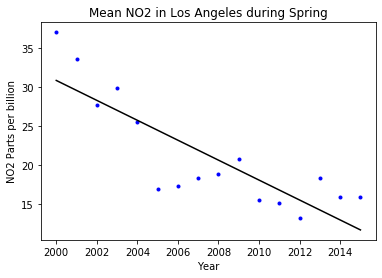

r value for Mean O3 Los Angeles Spring: 0.6130674768872139


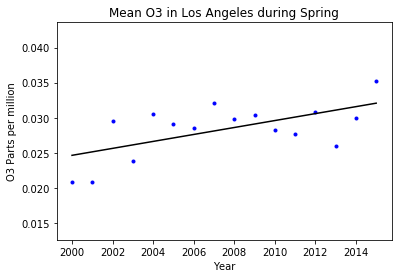

r value for Mean SO2 Los Angeles Spring: -0.651682379500162


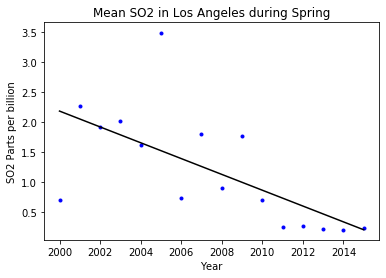

r value for Mean CO Los Angeles Spring: -0.7389083486937323


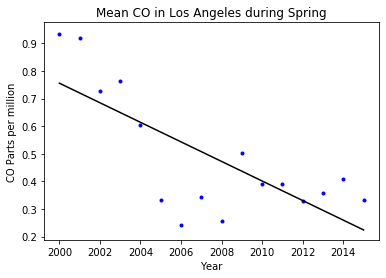

r value for Mean NO2 Los Angeles Summer: -0.8369772851342061


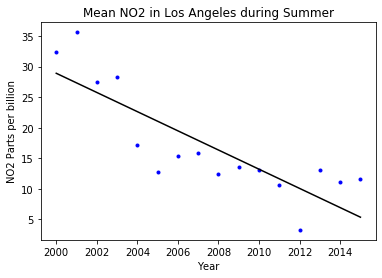

r value for Mean O3 Los Angeles Summer: 0.2590505914161864


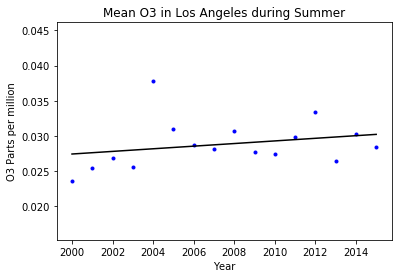

r value for Mean SO2 Los Angeles Summer: -0.7841766421154579


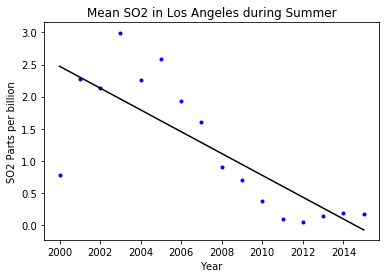

r value for Mean CO Los Angeles Summer: -0.6680298330686308


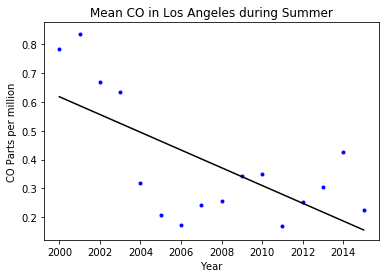

r value for Mean NO2 Los Angeles Fall: -0.8719177141515452


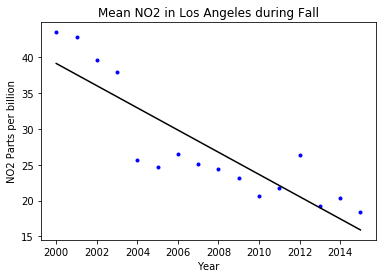

r value for Mean O3 Los Angeles Fall: 0.70970376085122


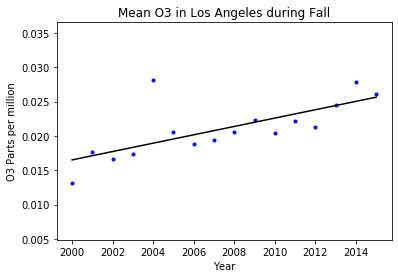

r value for Mean SO2 Los Angeles Fall: -0.7183489980336849


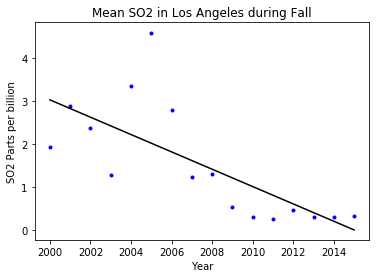

r value for Mean CO Los Angeles Fall: -0.7737135755114847


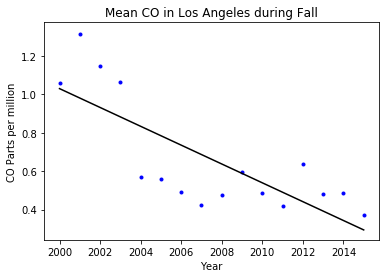

r value for Mean NO2 Los Angeles Winter: -0.7285134590306244


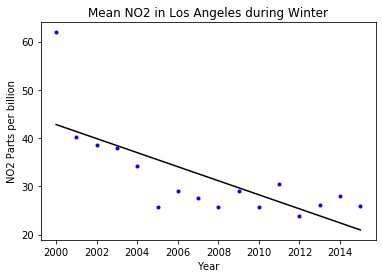

r value for Mean O3 Los Angeles Winter: 0.8717607072690767


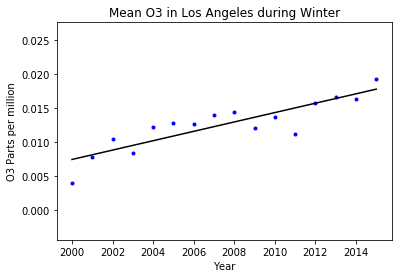

r value for Mean SO2 Los Angeles Winter: -0.8435470745103896


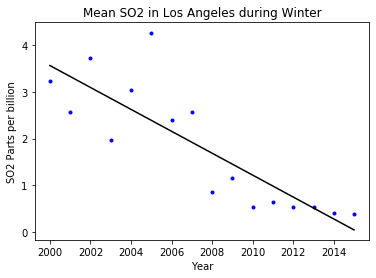

r value for Mean CO Los Angeles Winter: -0.7474359294628096


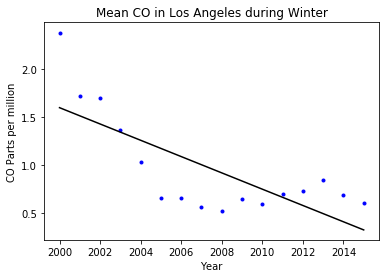

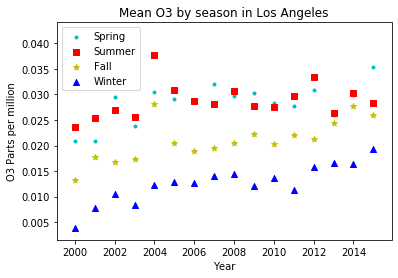

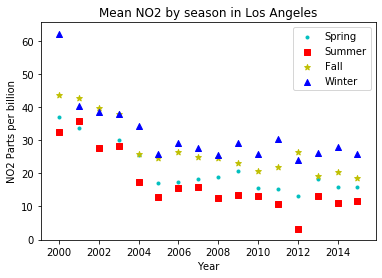

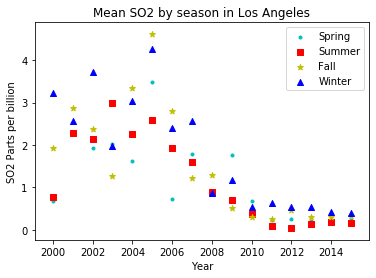

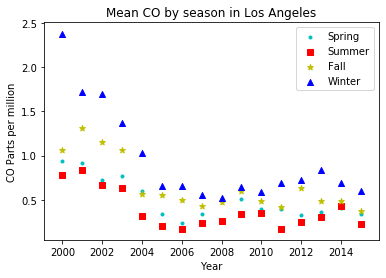

In [87]:
AnalyzeCity('Los Angeles', dfData)

r value for Mean NO2 New York Spring: -0.9423204287273462


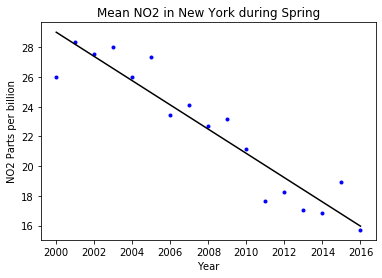

r value for Mean O3 New York Spring: 0.8472462235689912


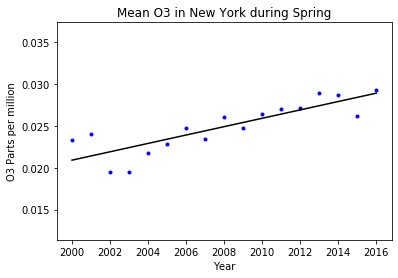

r value for Mean SO2 New York Spring: -0.923566931676512


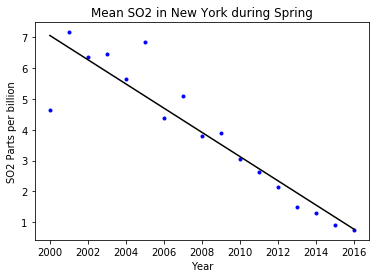

r value for Mean CO New York Spring: -0.8984065293453063


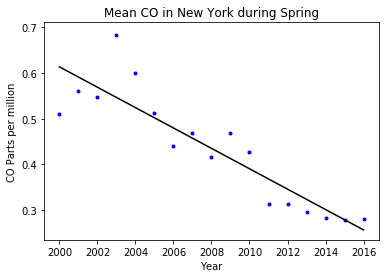

r value for Mean NO2 New York Summer: -0.975699103305367


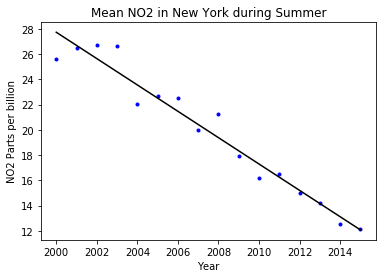

r value for Mean O3 New York Summer: 0.6440624150832286


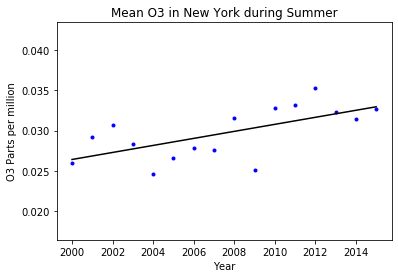

r value for Mean SO2 New York Summer: -0.9746132502571603


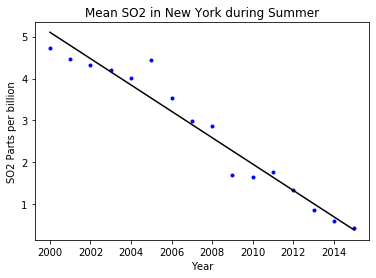

r value for Mean CO New York Summer: -0.8930908389526627


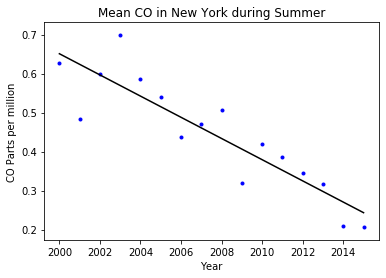

r value for Mean NO2 New York Fall: -0.9380566335962758


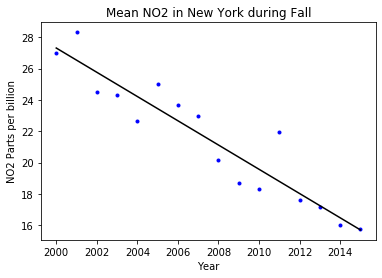

r value for Mean O3 New York Fall: 0.9097558150424996


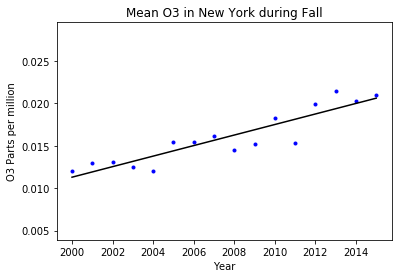

r value for Mean SO2 New York Fall: -0.9770140321428507


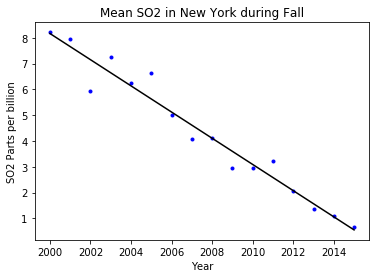

r value for Mean CO New York Fall: -0.9348602556877832


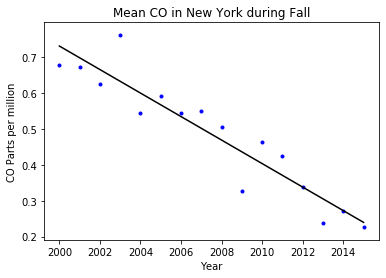

r value for Mean NO2 New York Winter: -0.9111485037182505


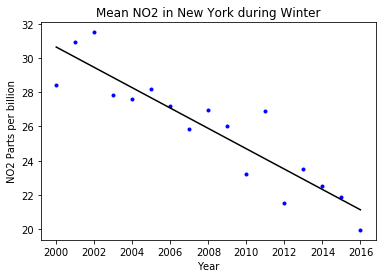

r value for Mean O3 New York Winter: 0.9089035772147349


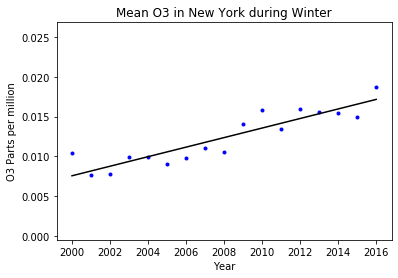

r value for Mean SO2 New York Winter: -0.9719465761718388


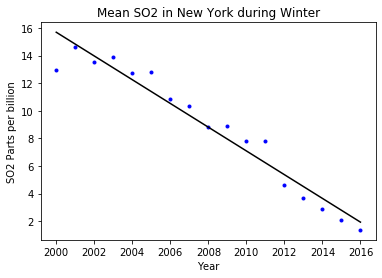

r value for Mean CO New York Winter: -0.9709977235636343


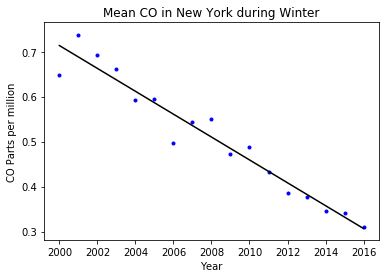

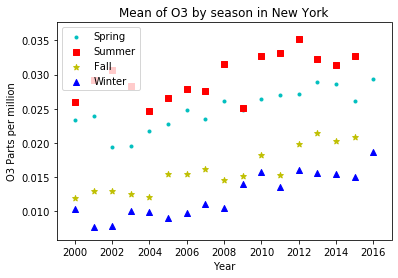

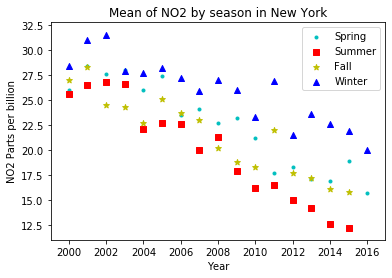

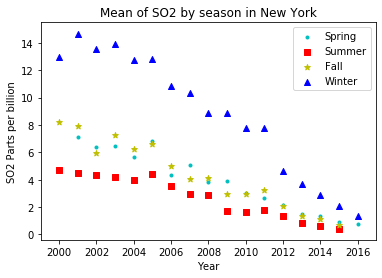

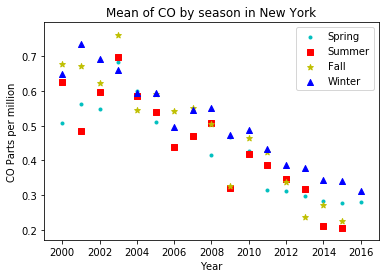

In [167]:
AnalyzeCity('New York', dfData)

r value for AQI O3 Los Angeles Spring: 0.5483977646620547
r value for AQI O3 Los Angeles Summer: -0.4698402676347251


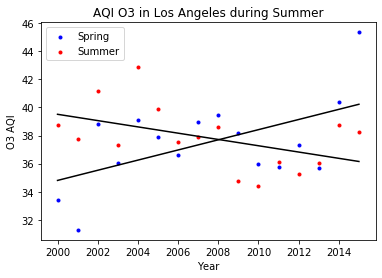

In [92]:
dfCity = SetupCity('Los Angeles', dfData)    
dfSpring, dfSummer, dfFall, dfWinter = SetupSeasons(dfCity)

dfO3Spring = RemoveOutliers(dfSpring, 'O3', measure = 'AQI')
dfO3Summer = RemoveOutliers(dfSummer, 'O3', measure = 'AQI')
dfO3Fall = RemoveOutliers(dfFall, 'O3', measure = 'AQI')
dfO3Winter = RemoveOutliers(dfWinter, 'O3', measure = 'AQI')

plt.show()

PlotPollutant(dfO3Spring, 'Los Angeles', 'Spring', 'O3', measure = 'AQI', linregress = True)
PlotPollutant(dfO3Summer, 'Los Angeles', 'Summer', 'O3', measure = 'AQI', linregress = True, color = 'r')

plt.legend()
plt.show()

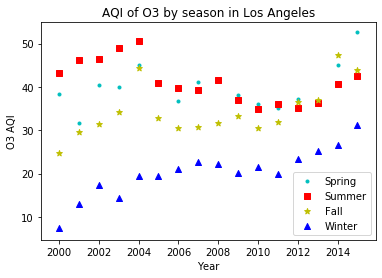

In [97]:
PrintMerged([dfSpring, dfSummer, dfFall, dfWinter], 'O3', measure = "AQI")

(array([656., 143.,  85.,  61.,  49.,  21.,  18.,   7.,   4.,   3.]),
 array([ 1. ,  2.1,  3.2,  4.3,  5.4,  6.5,  7.6,  8.7,  9.8, 10.9, 12. ]),
 <a list of 10 Patch objects>)

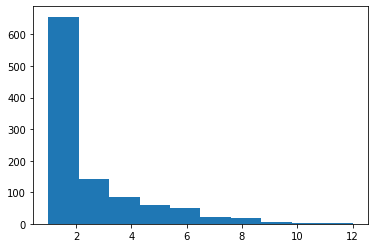

In [100]:
plt.hist(dfSpring['O3 Mean'].value_counts())

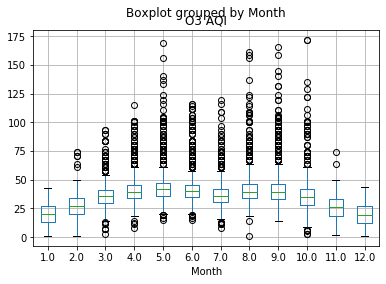

In [156]:
dfCity.boxplot('O3 AQI', by = "Month" )


In [106]:
stats.f_oneway(dfO3Spring['O3 Mean'], dfO3Summer['O3 Mean'], dfO3Fall['O3 Mean'], dfO3Winter['O3 Mean'])

F_onewayResult(statistic=1.0053500794101284, pvalue=0.31606875894409114)

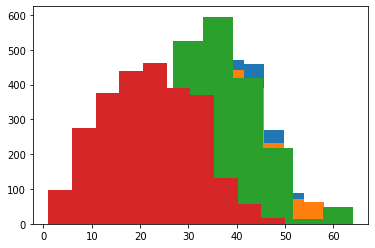

In [148]:
plt.hist(dfO3Spring['O3 AQI'])
plt.hist(dfO3Summer['O3 AQI'])
plt.hist(dfO3Fall['O3 AQI'])
plt.hist(dfO3Winter['O3 AQI'])
plt.show()

In [170]:
observed = pd.Series([dfSpring['O3 AQI'].mean(),dfSummer['O3 AQI'].mean(), dfFall['O3 AQI'].mean(), dfWinter['O3 AQI'].mean()], 
                     index=["Spring", "Summer", "Fall", "Winter"])

dfChiTest = pd.DataFrame([observed]).T
dfChiTest[1] = 50

dfChiTest.columns = ["Observed", 'Expected']

criticalValue = stats.chi2.ppf(q = 0.95, df = 3)

stats.chisquare(dfChiTest['Observed'], dfChiTest['Expected'])

Power_divergenceResult(statistic=23.443759768553157, pvalue=3.2633911240398714e-05)